In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
#load csv data and plot in data frame
df = pd.read_csv("student data.csv")
df.head()

,id,gender,instagram_followers,linkedin_con,texts_yesterday,phones_owned,apps_phone,os_phone,like_social,like_tech
0,1,male,0.0,642.0,47.0,7.0,101.0,Android,Undecided,Undecided
1,2,female,155.0,157.0,150.0,8.0,44.0,iOS,Agree,Agree
2,3,female,169.0,119.0,20.0,5.0,65.0,iOS,Agree,Agree
3,4,male,NaN,150.0,100.0,5.0,67.0,Android,Agree,Strongly agree
4,5,male,25.0,120.0,420.0,2.0,70.0,Android,Undecided,Agree


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-4.575,0.5,'Linkedin Contacts')

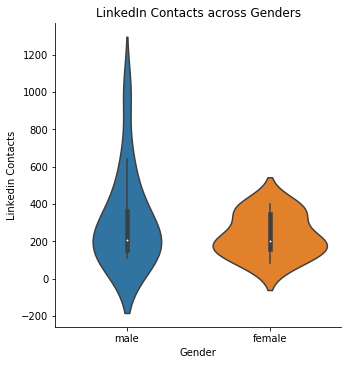

In [11]:
#Make a plot of the relation showing the distribution for the two levels (e.g., histogram, violin plot, etc.)
#I used the violin plot to show the relationship between gender and linkedin contacts
sns.catplot(x="gender", y= "linkedin_con", kind="violin", data = df)
plt.title('LinkedIn Contacts across Genders')
plt.xlabel("Gender")
plt.ylabel("Linkedin Contacts")

In [4]:
#getting the mean values

male = df[df['gender']=='male'] #this gets us a dataframe with males
female = df[df['gender']=='female'] #ditto for the females

male_mean = male['linkedin_con'].mean()
female_mean = female['linkedin_con'].mean()
print(f'The mean number of LinkedIn contacts for men is {male_mean}')
print(f'The mean number of LinkedIn contacts for women is {female_mean}') 

The mean number of LinkedIn contacts for men is 312.64285714285717
The mean number of LinkedIn contacts for women is 231.66666666666666


In [5]:
#We are doing an independent t-test (ttest_ind) and getting the p-value
#These will give us indicatications of whether there is a significant statistical relation
#By using the argument nan_policy we are telling Python to drop the NA's (otherwise, we would get an error)
result = ttest_ind(male['linkedin_con'], female['linkedin_con'], nan_policy='omit')
result

Ttest_indResult(statistic=0.9014740740439696, pvalue=0.37755955142961817)

In [8]:
#If the p-value were below 0.05, we would conclude that H0 is likely false and H1 is true: 
print(f"The p-value is:{result[1]}")
print("The p-value is high therefore H0 is likely true.")
print ("Meaning there is no significant relationship between the number of linkedin contacts and gender.")

The p-value is:0.37755955142961817
The p-value is high therefore H0 is likely true.
Meaning there is no significant relationship between the number of linkedin contacts and gender.
